# Heart Disease Analysis

To start this project, I will import the data and perform an exploratory data analysis to fully understand the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### import data to csv and clean it up

In [2]:
df = pd.read_csv('resources/framingham.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
print(df['male'].count())

4240


In [4]:
df = df.dropna()
df=df.drop_duplicates()

In [5]:
print(df['male'].count())

3658


### Descriptive Statistics

In [6]:
#Statistics for Age
df['age'].agg(['max','min','mean','median','var','std','sem',], axis= 0)

max       70.000000
min       32.000000
mean      49.551941
median    49.000000
var       73.308349
std        8.562029
sem        0.141565
Name: age, dtype: float64

In [7]:
#Statistics for Education
df['education'].agg(['max','min','mean','median','var','std','sem'], axis= 0)

max       4.000000
min       1.000000
mean      1.980317
median    2.000000
var       1.045825
std       1.022656
sem       0.016909
Name: education, dtype: float64

In [8]:
#Statistics for totChol
df['totChol'].agg(['max','min','mean','median','var','std','sem'], axis= 0)

max        600.000000
min        113.000000
mean       236.847731
median     234.000000
var       1944.605465
std         44.097681
sem          0.729111
Name: totChol, dtype: float64

In [9]:
#Statistics for sysBP
df['sysBP'].agg(['max','min','mean','median','var','std','sem'], axis= 0)

max       295.000000
min        83.500000
mean      132.370558
median    128.000000
var       487.829631
std        22.086866
sem         0.365184
Name: sysBP, dtype: float64

In [10]:
#Statistics for diaBP
df['diaBP'].agg(['max','min','mean','median','var','std','sem'], axis= 0)

max       142.500000
min        48.000000
mean       82.917031
median     82.000000
var       143.382846
std        11.974258
sem         0.197982
Name: diaBP, dtype: float64

In [11]:
#statistics for BMI
df['BMI'].agg(['max','min','mean','median','var','std','sem'], axis= 0)

max       56.800000
min       15.540000
mean      25.782802
median    25.380000
var       16.529109
std        4.065601
sem        0.067221
Name: BMI, dtype: float64

In [12]:
#IQR for totChol
quartiles1= df['totChol'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers for total Cholesterol.")
print(f"Values above {upper_bound1} could be outliers for total Cholesterol.")

Values below 120.5 could be outliers for total Cholesterol.
Values above 348.5 could be outliers for total Cholesterol.


In [13]:
#IQR for sysBP
quartiles2= df['sysBP'].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers for sysBP.")
print(f"Values above {upper_bound2} could be outliers for sysBP.")

Values below 76.6875 could be outliers for sysBP.
Values above 184.1875 could be outliers for sysBP.


In [14]:
#IQR for diaBP
quartiles3= df['diaBP'].quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Values below {lower_bound3} could be outliers for diaBP.")
print(f"Values above {upper_bound3} could be outliers for diaBP.")

Values below 52.5 could be outliers for diaBP.
Values above 112.5 could be outliers for diaBP.


In [15]:
#IQR for BMI
quartiles4= df['BMI'].quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be outliers for the BMI.")
print(f"Values above {upper_bound4} could be outliers for the BMI.")

Values below 15.643749999999994 could be outliers for the BMI.
Values above 35.47375000000001 could be outliers for the BMI.


### Data Visualizations

In [16]:
gender_chart = df['male'].value_counts()

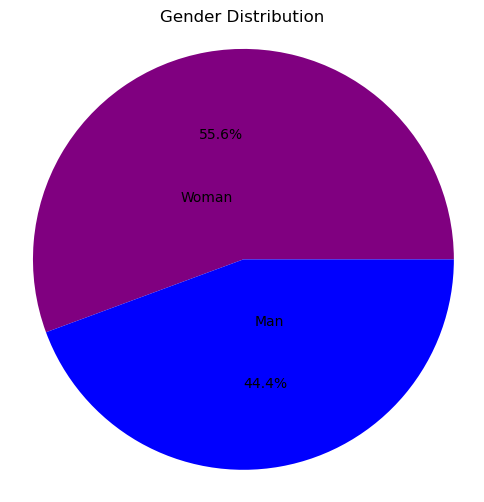

In [17]:
gender_labels = ["Woman", "Man"]
gender_chart = df['male'].value_counts()

plt.figure(figsize=(6, 6))  
sns.set_palette(["purple", "blue"])  

plt.pie(gender_chart, labels=gender_labels, autopct='%0.1f%%',labeldistance=0.3)
plt.title('Gender Distribution')

plt.axis('equal')  
plt.savefig("images/gender_distr")
plt.show()

In [18]:
print(df['age'].min())
print(df['age'].max())

32
70


In [20]:
bins = [32, 42, 53, 65, 70]
age_labels = ['32-42', '43-53', '54-65', '65+'] 
df['age_group'] = pd.cut(df['age'], bins=bins, labels=age_labels, right=False)


In [21]:
df['age_group'].value_counts()

43-53    1501
54-65    1224
32-42     793
65+       139
Name: age_group, dtype: int64

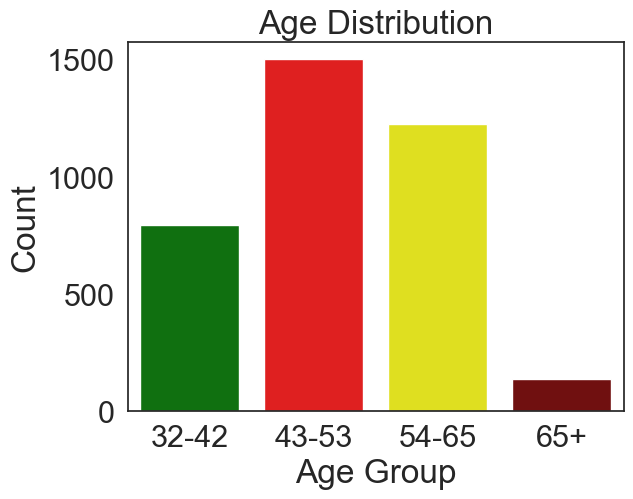

In [24]:
age_chart = df['age_group'].value_counts()

sns.barplot(x=age_chart.index, y=age_chart, palette=["green", "red",'yellow', 'maroon'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.savefig("images/age_distri")
plt.show()

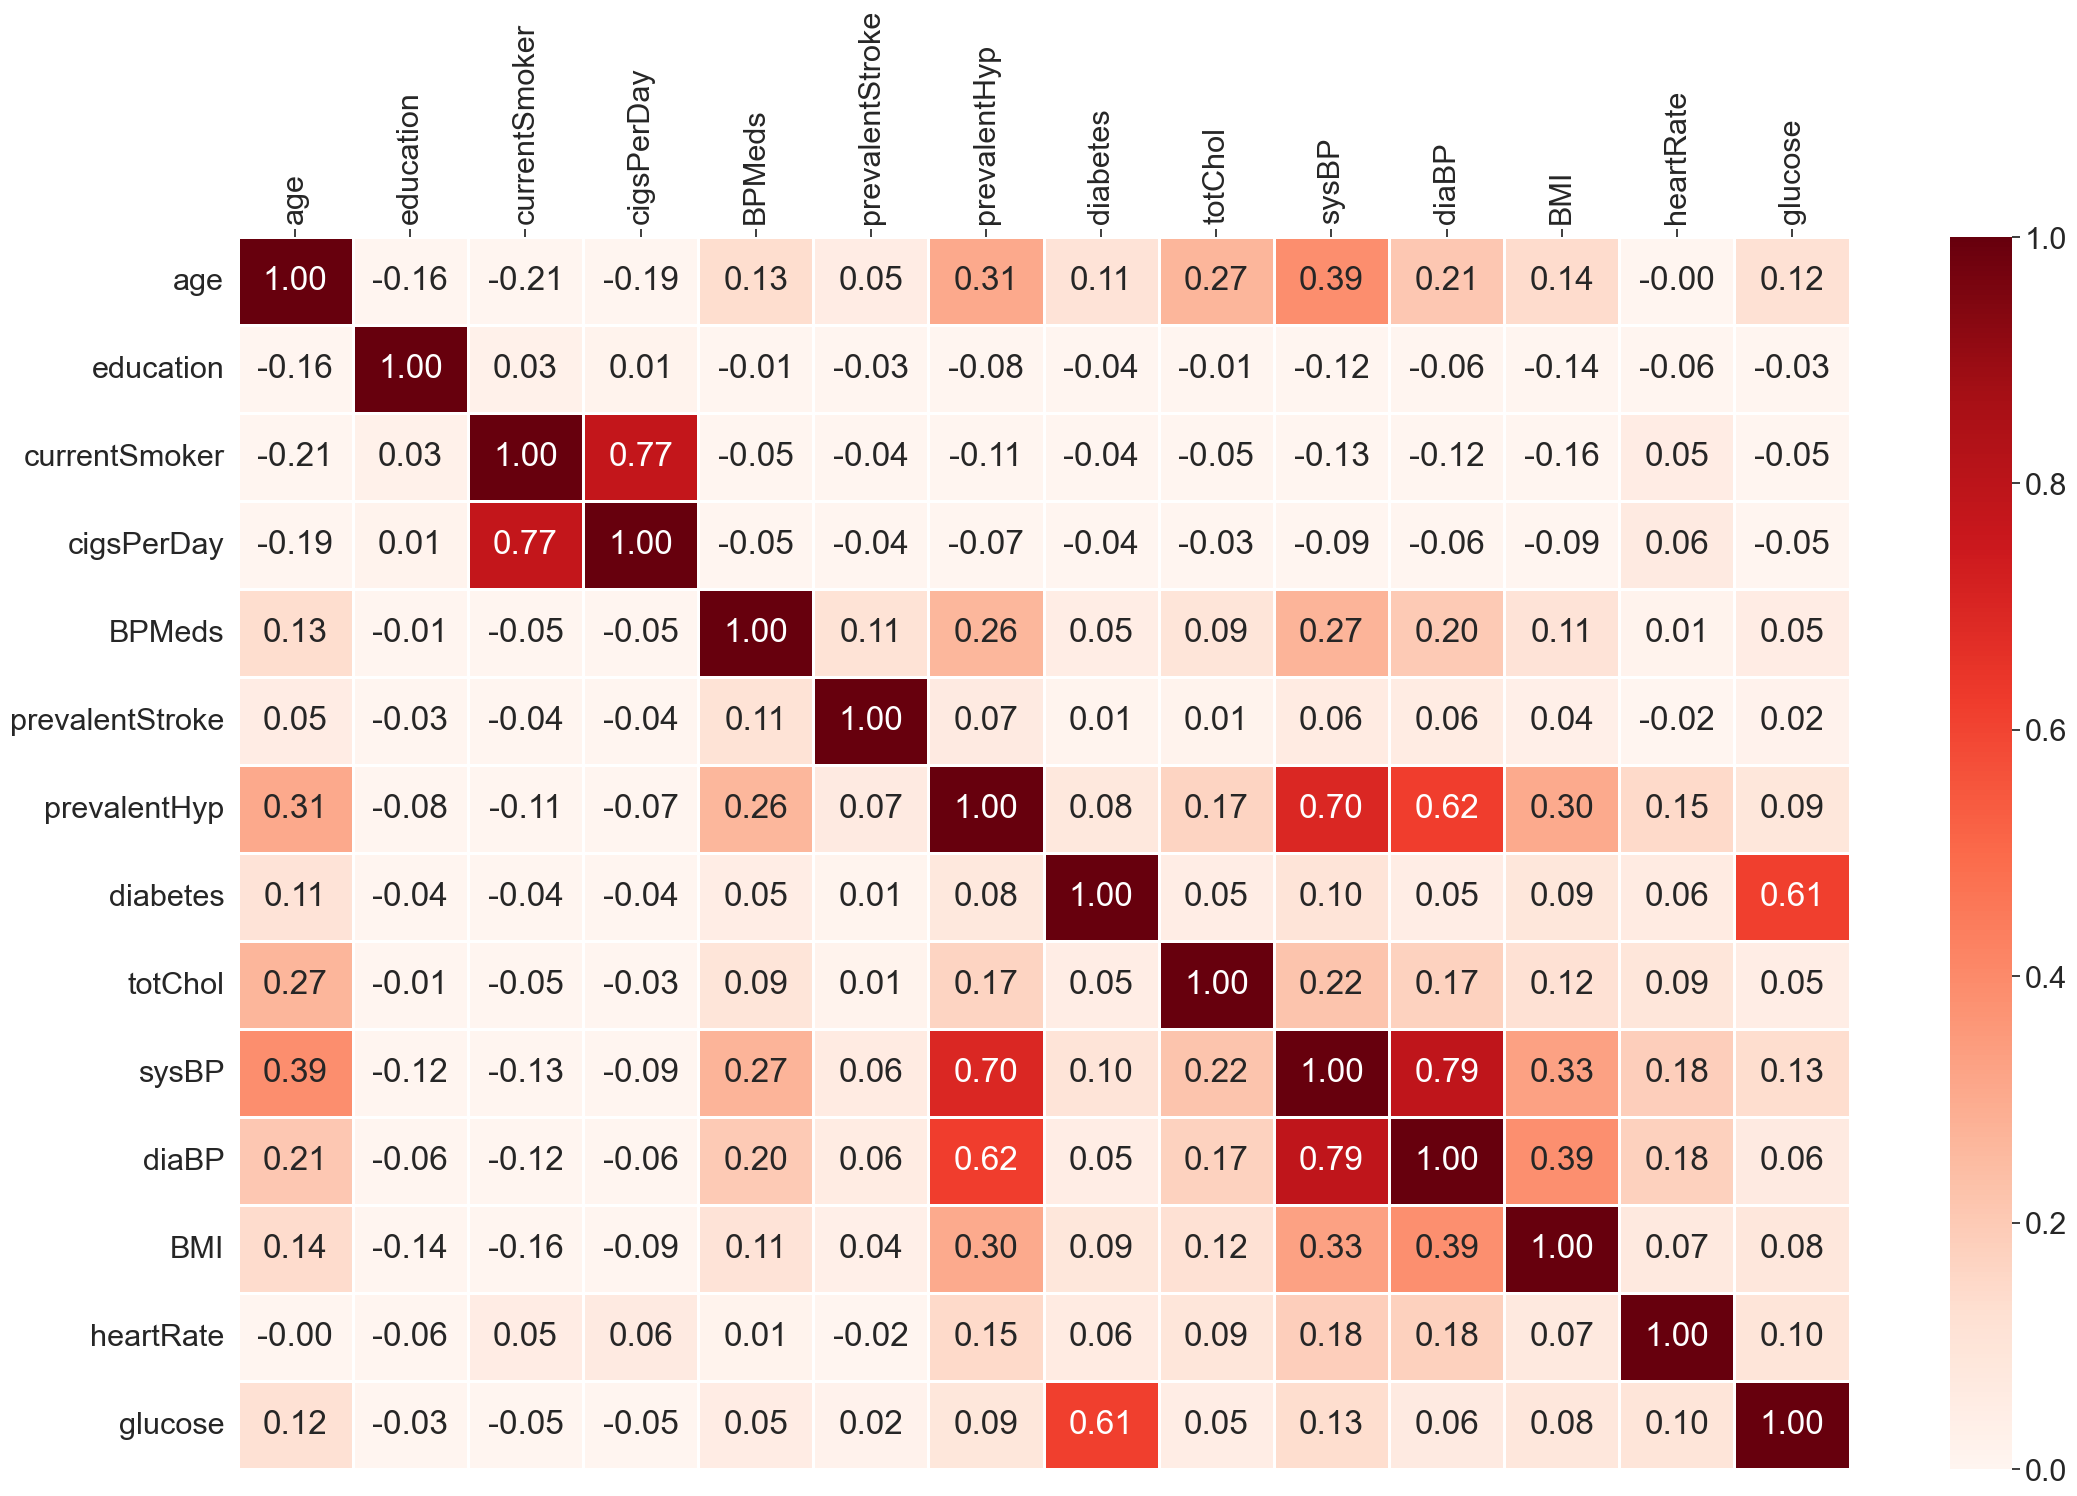

In [25]:
#create correlation heatmap
corr_df=df.drop(['male', 'TenYearCHD','age_group'], axis=1)
sns.set(style="white",font_scale=2)
plt.figure(figsize = (26,16))
ax=sns.heatmap(corr_df.corr(), cmap="Reds", fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2, vmin=0, vmax=1)
# Set x-axis on top and rotate for clarity
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.savefig("images/heatmap")
plt.show()